--- Part 1: K-Means Clustering ---

Original K-Means Dataset Head:
   Feature_1  Feature_2
0  -7.155244  -7.390016
1  -7.395875  -7.110843
2  -2.015671   8.281780
3   4.509270   2.632436
4  -8.102502  -7.484961


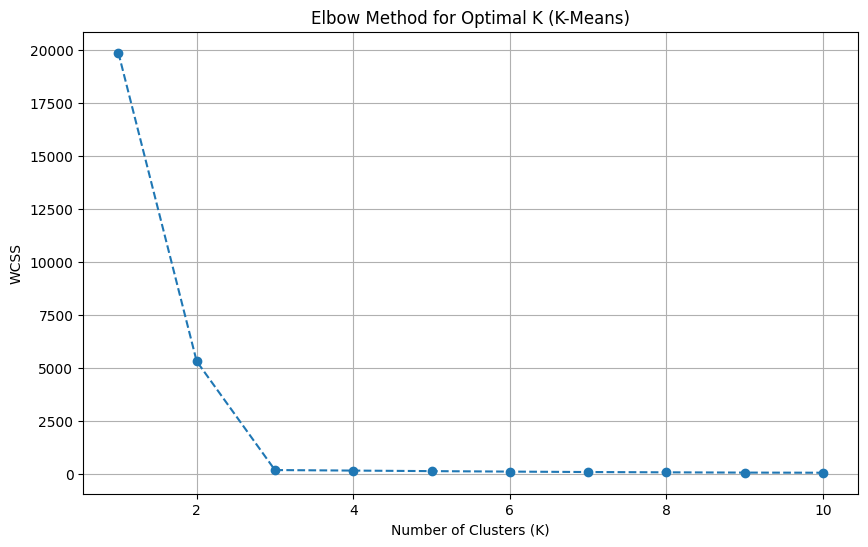

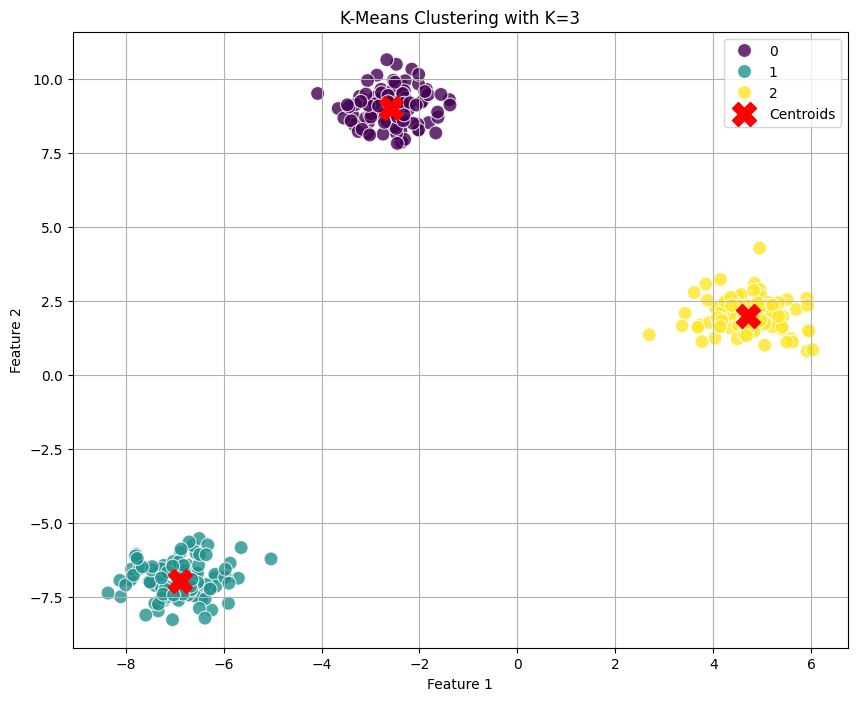


Silhouette Score for K-Means (K=3): 0.908

--- Part 2: Dimensionality Reduction with PCA ---

Original PCA Dataset Head:
   Feature_1  Feature_2  Feature_3  Feature_4  True_Cluster
0  -0.638667   1.110057  -6.400722  -0.204990             3
1  -2.951556  -7.657445   3.844794   0.903589             1
2  -0.253177   2.125103  -7.869801   0.559678             3
3  -2.151209   3.401400  -5.734930   0.965230             3
4  -2.347519  -7.230467   3.478891  -0.443440             1
Original PCA Dataset Shape: (500, 5)

Scaled PCA Dataset Head:
   Feature_1  Feature_2  Feature_3  Feature_4
0  -0.559286   0.720080  -1.022508   0.994456
1  -1.182017  -1.523760   1.516183   1.303719
2  -0.455495   0.979857  -1.386524   1.207777
3  -0.966528   1.306496  -0.857534   1.320915
4  -1.019384  -1.414484   1.425518   0.927935

Principal Components DataFrame Head:
   Principal_Component_1  Principal_Component_2  True_Cluster
0               0.455305               1.623917             3
1              -2

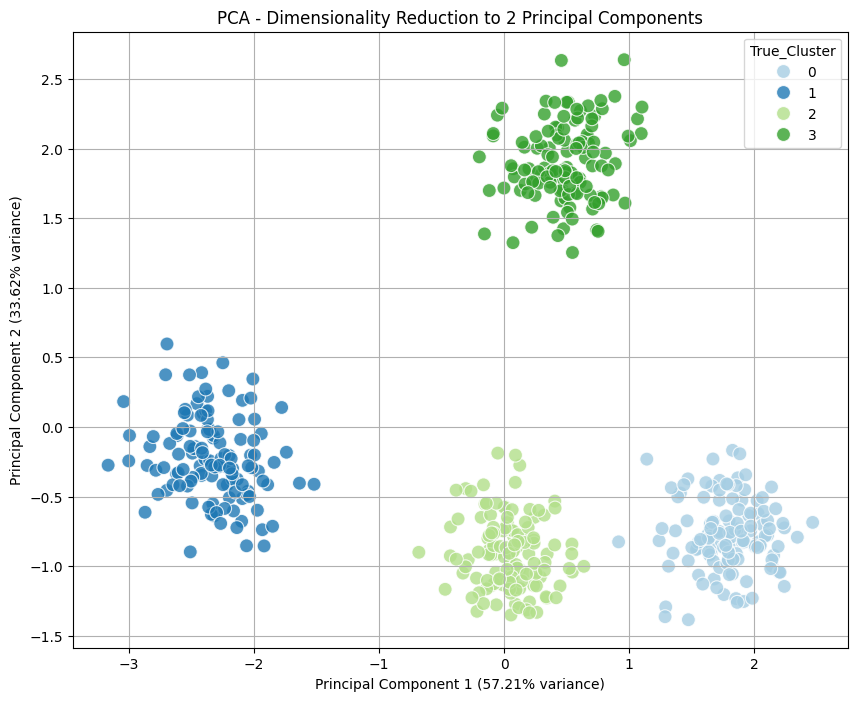

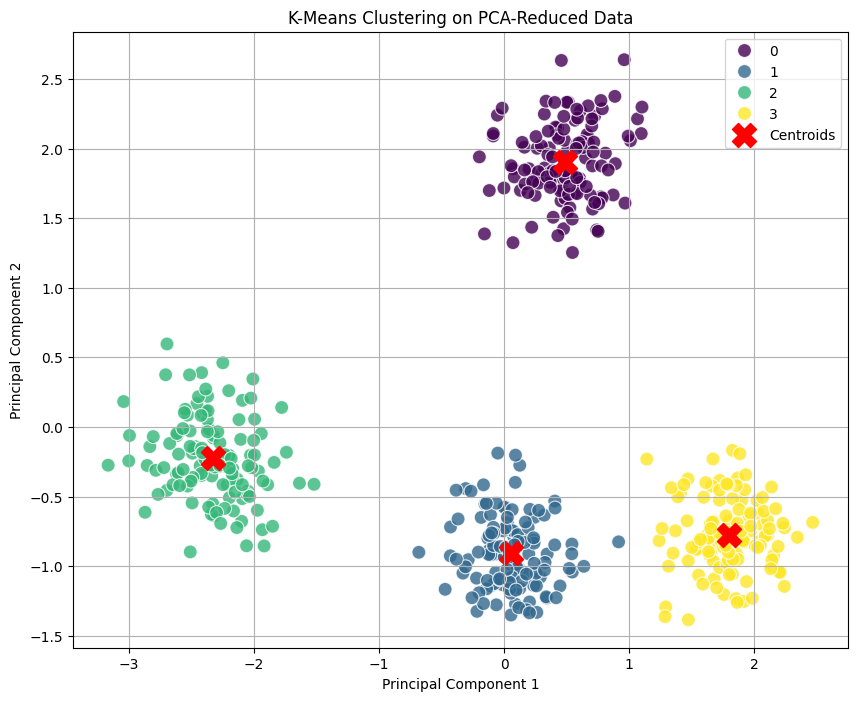


Silhouette Score for K-Means on PCA-Reduced Data (K=4): 0.776


In [ ]:
/mmloi9import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs  # A simple dataset generator for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score  # To evaluate clustering performance

# --- Part 1: K-Means Clustering ---
print("--- Part 1: K-Means Clustering ---")

# 1. Dataset Generation (synthetic dataset with 3 clusters)
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

# Convert to DataFrame (optional)
df_kmeans = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
print("\nOriginal K-Means Dataset Head:")
print(df_kmeans.head())

# 2. Elbow Method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K (K-Means)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Assume K=3 from the elbow plot

# 3. Apply K-Means with chosen K
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)
df_kmeans['Cluster'] = clusters

# 4. Visualize K-Means Clustering Result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=df_kmeans,
                palette='viridis', s=100, alpha=0.8, legend='full')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.grid(True)
plt.show()

# 5. Evaluate K-Means using Silhouette Score
silhouette_avg = silhouette_score(X, clusters)
print(f"\nSilhouette Score for K-Means (K={optimal_k}): {silhouette_avg:.3f}")

# --- Part 2: Dimensionality Reduction with PCA ---
print("\n--- Part 2: Dimensionality Reduction with PCA ---")

# 1. Dataset Generation with 4 features and 4 clusters
X_pca, y_pca = make_blobs(n_samples=500, n_features=4, centers=4, cluster_std=1.0, random_state=25)
df_pca_original = pd.DataFrame(X_pca, columns=[f'Feature_{i+1}' for i in range(X_pca.shape[1])])
df_pca_original['True_Cluster'] = y_pca

print("\nOriginal PCA Dataset Head:")
print(df_pca_original.head())
print(f"Original PCA Dataset Shape: {df_pca_original.shape}")

# 2. Standardize the Data
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)
df_pca_scaled = pd.DataFrame(X_pca_scaled, columns=[f'Feature_{i+1}' for i in range(X_pca_scaled.shape[1])])
print("\nScaled PCA Dataset Head:")
print(df_pca_scaled.head())

# 3. Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_pca_scaled)

df_principal_components = pd.DataFrame(data=principal_components,
                                       columns=['Principal_Component_1', 'Principal_Component_2'])
df_principal_components['True_Cluster'] = y_pca

print("\nPrincipal Components DataFrame Head:")
print(df_principal_components.head())

# 4. Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print(f"\nExplained Variance Ratio for each PC: {explained_variance}")
print(f"Total Explained Variance by 2 PCs: {explained_variance.sum():.3f}")

# 5. Visualize PCA Result
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal_Component_1', y='Principal_Component_2', hue='True_Cluster',
                data=df_principal_components, palette='Paired', s=100, alpha=0.8, legend='full')
plt.title('PCA - Dimensionality Reduction to 2 Principal Components')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]*100:.2f}% variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]*100:.2f}% variance)')
plt.grid(True)
plt.show()

# 6. Optional: K-Means on PCA-reduced data
kmeans_pca = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_pca = kmeans_pca.fit_predict(principal_components)
df_principal_components['KMeans_Cluster_on_PCA'] = clusters_pca

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal_Component_1', y='Principal_Component_2',
                hue='KMeans_Cluster_on_PCA',
                data=df_principal_components, palette='viridis', s=100, alpha=0.8, legend='full')
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

silhouette_avg_pca = silhouette_score(principal_components, clusters_pca)
print(f"\nSilhouette Score for K-Means on PCA-Reduced Data (K=4): {silhouette_avg_pca:.3f}")
